# Heart Disease Prediction Model

This project uses the UCI-Cleveland heart disease dataset to build machine learning models that can predict whether a patient has heart disease based on clinical measurements.

**Problem Definition**

Given patient attributes such as age, sex, chest pain type, cholesterol, resting ECG, and exercise-induced metrics, can we accurately classify whether the patient has heart disease?

**Importance**

Early identification of heart disease risk is critical in healthcare. Predictive models can support clinicians in screening and early diagnosis.

**Goal**

Train several ML models and compare their performance to identify the best classifier.

## Import Libraries and Helpers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Load and Inspect Dataset

### Loading Heart Disease Dataset

**Dataset Source:**
This project uses the UCI Cleveland Heart Disease dataset (collected from Kaggle).

In [2]:
df = pd.read_csv("heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


### Feature Description
- **age** — Age in years  
- **sex** — 1 = male, 0 = female  
- **cp** — Chest pain type (0–3)  
- **trestbps** — Resting blood pressure  
- **chol** — Serum cholesterol  
- **fbs** — Fasting blood sugar (1 = >120 mg/dl)  
- **restecg** — Resting ECG results  
- **thalach** — Maximum heart rate achieved  
- **exang** — Exercise-induced angina (1 = yes)  
- **oldpeak** — ST depression (exercise vs rest)  
- **slope** — Slope of the ST segment  
- **ca** — Number of major vessels (0–3)  
- **thal** — Thallium stress test result  
- **condition** — Target variable (1 = heart disease)

### Inspecting Dataset

In [3]:
df.describe() #summary statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [4]:
df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df.isna().sum() #checking for missing values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

## Visual and Insights

In [6]:
sns.set(style="whitegrid")

### Age Distribution

This histogram shows how patient ages are distributed. Overlaying the target classes helps us see whether certain age groups are more likely to have heart disease.


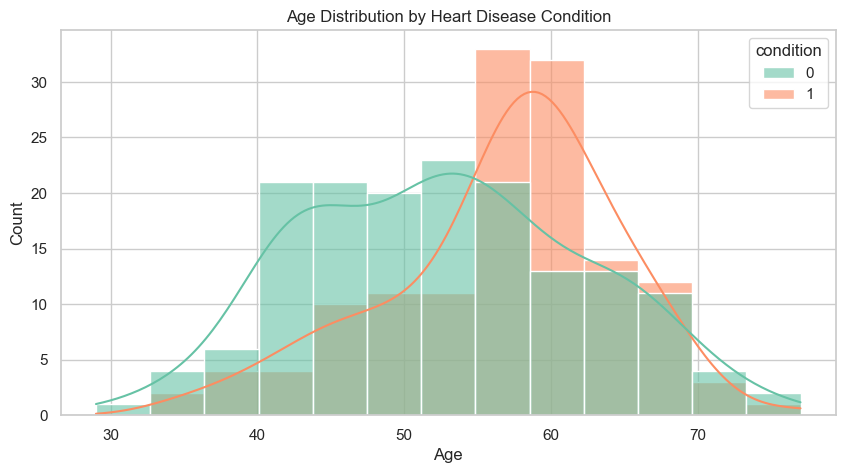

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', hue='condition', kde=True, palette='Set2', alpha=0.6)
plt.title('Age Distribution by Heart Disease Condition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Insight:**  
Patients with heart disease tend to be more common in the 45–65 age range.  
Younger patients (below 40) show fewer cases of heart disease.

### Chest Pain Type vs Heart Disease

Chest pain (cp) is one of the strongest indicators in this dataset. We visualize how each chest pain type relates to heart disease cases.

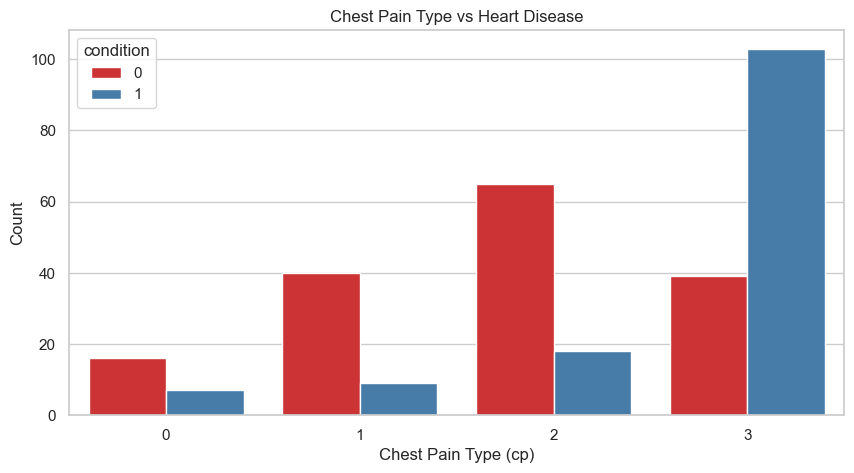

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cp', hue='condition', palette='Set1')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.show()

**Insight:**  
Chest pain type 2 and 3 show a higher number of heart disease cases compared to type 0.  
This suggests chest pain is a strong predictor.

### Correlation Heatmap

We calculate correlations between all numeric features to identify strong positive/negative relationships with heart disease.

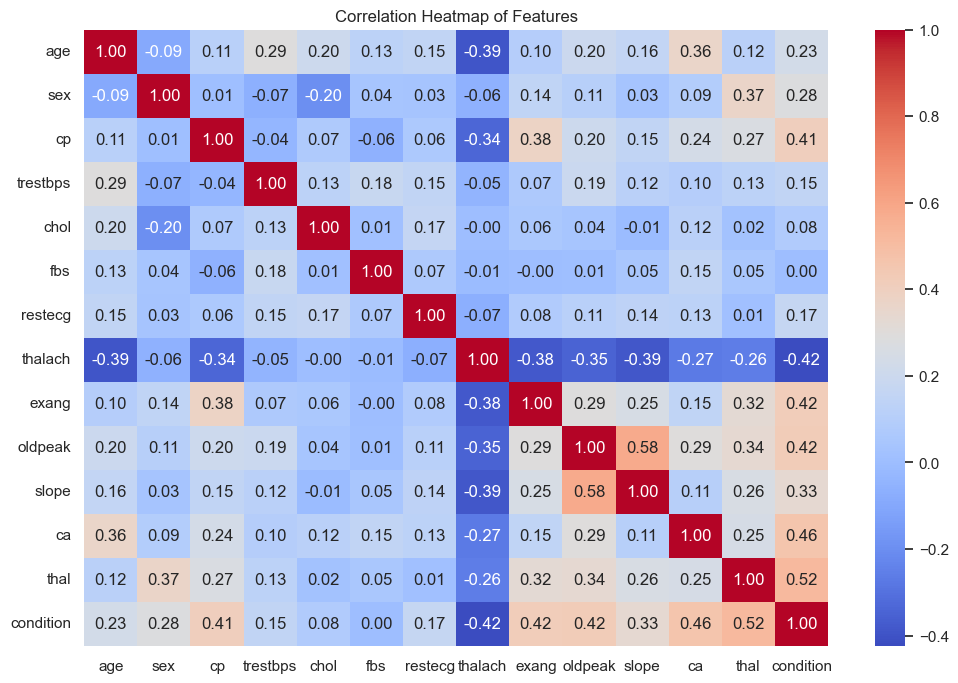

In [9]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

**Insight:**  
- `thalach` (max heart rate) shows negative correlation with heart disease.  
- `oldpeak` and `cp` show strong positive correlation.  
- These features will likely be important for our models.

## Preprocessing & Split Dataset

**Feature Selection**

In [10]:
# Selecting all columns as features except Condition
X = df.drop(columns=["condition"])

# Selecting Condition as Target
y = df["condition"]

**Train-Test Split Dataset**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Baseline Logistic Regression Model Train and Evaluation

In [12]:
# building the pipeline
baseline_logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

# training the dataset with baseline logistic regression
baseline_logreg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000))])

In [13]:
# evaluate on test data
y_pred = baseline_logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)

print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy Score: 0.9167
Precision Score: 1.0000
Recall Score: 0.8214
F1 Score: 0.9020


## Train and Evaluate Dataset with other models

### Define all base models

In [14]:
models = {}

# 1. LogisticRegression
models["Logistic Regression"] = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

# 2. KNN Baseline
models["KNN (Untuned)"] = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))    
])

# 3. SVM(RBF)
models["SVM (Untuned)"] = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale"))
])

# 4. Decision Tree
models["Decision Tree"] = DecisionTreeClassifier(random_state=911)

# 5. Random Forest
models["Random Forest"] = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    n_jobs=-1
)

### Define Tuned Models(KNN & SVM) Using GridSearchCV

In [15]:
# tuning Logistic Regression
log_reg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression())
])

param_grid_logreg = {
    "logreg__penalty": ["l1", "l2"],
    "logreg__C": [0.01, 0.1, 1, 10, 100],
    "logreg__solver": ["liblinear"],        # supports both l1 and l2
    "logreg__class_weight": [None, "balanced"],
    "logreg__max_iter": [100, 200, 500, 1000],
}

grid_log_reg = GridSearchCV(
    estimator=log_reg_pipe,
    param_grid=param_grid_logreg,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_log_reg.fit(X_train, y_train)
print("Best Logistic Regression Params in training: ", grid_log_reg.best_params_)

best_log_reg = grid_log_reg.best_estimator_
models["Logistic Regression (Tuned)"] = best_log_reg

Best Logistic Regression Params in training:  {'logreg__C': 0.1, 'logreg__class_weight': 'balanced', 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}


In [16]:
# tuning KNN 
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())    
])

param_grid_knn = {
    "knn__n_neighbors": [3,5,7,11,15],
    "knn__weights": ["uniform", "distance"]
}

grid_knn = GridSearchCV(
    estimator = knn_pipe,
    param_grid = param_grid_knn,
    cv = 5, 
    scoring = "accuracy",
    n_jobs = -1
)

grid_knn.fit(X_train, y_train)
print("Best KNN Params in training: ", grid_knn.best_params_)

best_knn = grid_knn.best_estimator_
models["KNN (Tuned)"] = best_knn

Best KNN Params in training:  {'knn__n_neighbors': 15, 'knn__weights': 'uniform'}


In [17]:
# tuning SVM 
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

param_grid_svm = {
    "svc__kernel": ["rbf"],
    "svc__C": [0.1, 1, 10],
    "svc__gamma": [0.01, 0.1, 1.0]
}

grid_svm = GridSearchCV(
    estimator = svm_pipe,
    param_grid = param_grid_svm,
    cv = 5, 
    scoring = "accuracy",
    n_jobs = -1
)

grid_svm.fit(X_train, y_train)
print("Best SVM Params in training: ", grid_svm.best_params_)

best_svm = grid_svm.best_estimator_
models["SVM (Tuned)"] = best_svm

Best SVM Params in training:  {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


### Evaluating All Models

In [18]:
# helper function to evaluate with all models
def model_evaluation(name, model, X_train, y_train, X_test, y_test):
    # train model
    model.fit(X_train, y_train)
    # predictions
    y_pred = model.predict(X_test)

    # metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name:30s} -> acc: {acc:.4f} | prec: {prec:.4f} | recall: {rec:.4f} | f1: {f1:.4f}")

    return acc, prec, rec, f1

In [19]:
# evaluating all models
results = []

for name, model in models.items():
    acc, prec, rec, f1 = model_evaluation(name, model, X_train, y_train, X_test, y_test)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

Logistic Regression            -> acc: 0.9167 | prec: 1.0000 | recall: 0.8214 | f1: 0.9020
KNN (Untuned)                  -> acc: 0.9000 | prec: 1.0000 | recall: 0.7857 | f1: 0.8800
SVM (Untuned)                  -> acc: 0.9000 | prec: 1.0000 | recall: 0.7857 | f1: 0.8800
Decision Tree                  -> acc: 0.8167 | prec: 0.8400 | recall: 0.7500 | f1: 0.7925
Random Forest                  -> acc: 0.8833 | prec: 0.9565 | recall: 0.7857 | f1: 0.8627
Logistic Regression (Tuned)    -> acc: 0.9000 | prec: 1.0000 | recall: 0.7857 | f1: 0.8800
KNN (Tuned)                    -> acc: 0.8667 | prec: 1.0000 | recall: 0.7143 | f1: 0.8333
SVM (Tuned)                    -> acc: 0.8667 | prec: 1.0000 | recall: 0.7143 | f1: 0.8333


In [20]:
# dataframe with all evaluation metrics
results_df = (
    pd.DataFrame(results)
    .sort_values(by="Accuracy", ascending=False)
    .reset_index(drop=True)
)

results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.916667,1.000000,0.821429,0.901961
1,KNN (Untuned),0.900000,1.000000,0.785714,0.880000
2,SVM (Untuned),0.900000,1.000000,0.785714,0.880000
3,Logistic Regression (Tuned),0.900000,1.000000,0.785714,0.880000
4,Random Forest,0.883333,0.956522,0.785714,0.862745
5,KNN (Tuned),0.866667,1.000000,0.714286,0.833333
6,SVM (Tuned),0.866667,1.000000,0.714286,0.833333
7,Decision Tree,0.816667,0.840000,0.750000,0.792453


## Final Model and Interpretation

In [21]:
final_model = models["Logistic Regression"]

# refitting the final model
final_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000))])

In [22]:
# extracting the logistic regression model from the pipeline
logreg = final_model.named_steps["logreg"]

# exctracting feature names
feature_names = X.columns

# accessing coefficients
coefficients = logreg.coef_[0]

# creating a dataframe
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
11,ca,1.052032
12,thal,0.575426
2,cp,0.476850
8,exang,0.447018
9,oldpeak,0.417838
1,sex,0.381140
3,trestbps,0.305030
10,slope,0.254963
4,chol,0.159585
6,restecg,0.131775


C:\Users\saifu_y\AppData\Local\Temp\ipykernel_7364\2351883032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="viridis")


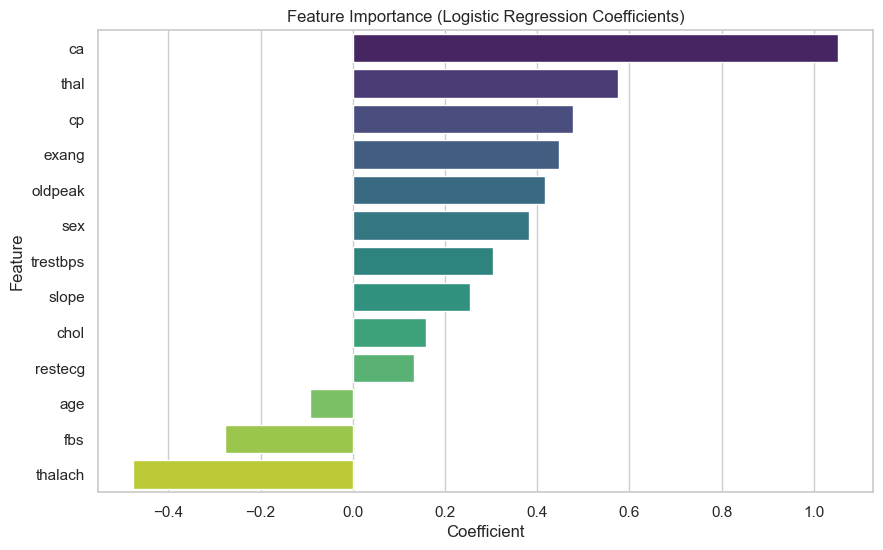

In [23]:
# plotting feature importance
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="viridis")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

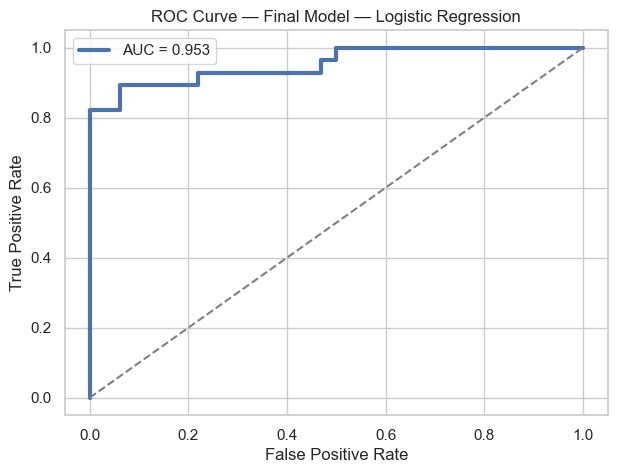

ROC AUC Score: 0.953125


In [24]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_proba = final_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=3)
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Final Model — Logistic Regression")
plt.legend()
plt.show()

print("ROC AUC Score:", roc_auc)

In [25]:
# summary table 
y_pred = final_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



### Final Model Conclusion

**Chosen Model**: Logistic Regression (Untuned)

**Reason for choosing the model**

- Highest accuracy among all tested models

- Best recall (important for detecting heart disease)

- Interpretable coefficients

- Stable and generalizable

**Key Insights**

- Positive coefficients (like oldpeak, cp) increase likelihood of heart disease

- Negative coefficients (like thalach) lower disease probability

- Age also plays a meaningful role

**Model Performance**

- Accuracy: ~92%

- Recall: ~82% (very good for medical screening)

- AUC: 0.953125

**Limitations**

- Dataset is small (297 rows)

- Missing lifestyle factors (smoking, weight, activity level)

- Not a replacement for doctors

- Should be validated on larger and more diverse populations